---
## Regression Tree Classifier Model

In this model the data set named 'credit_history.csv' is used to create a decision tree classifier model by using the DecisionTreeClassifier() object. It comes under the tree module of sklearn.

#### Objectives of this project

* Importing Required Packages
* Reading the Data set
* Data Sanity Checks
* Data Cleaning, feature engineering
* Data set splitting
* Define, train and Predict future values from model
* Check model performance using metrics
* Tabulate the results in a data frame
* Get the tree graph for this problem
---

---
### Importing Required Packages and Mounting Google drive from colab
---

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score, f1_score, log_loss, accuracy_score, roc_auc_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
### Reading the Data set named 'credit_history.csv' and performing data exploration

* Getting the first few rows
* Getting the column names
* Getting the shape of the data frame object
* Getting the Column types of the data frame
* Getting the Number of Missing Values
---

In [2]:
# Reading the data set using pandas library
data = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/credit_history.csv')
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [3]:
# Getting the Column names of the data frame
data.columns

Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')

In [4]:
# Getting the Shape of the data frame
print('Number of Rows/Samples/Records is:', data.shape[0])
print('Number of Columns/Features is:', data.shape[1])

Number of Rows/Samples/Records is: 7727
Number of Columns/Features is: 7


In [5]:
# Getting the Column Types of the data frame
data.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [6]:
# Number of Missing Values in Each Column
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

---
### Handling Missing Values

I observe that the 'years' column has 279 missing values. So in order to replace them with the mean of that column (mean is considered as the 'years' column is float type), fillna() function is used

---

In [12]:
# Handling Missing values and Replacing them with median of that column
year_median = data['years'].median()
year_median  # The median is 4.0

# Using fillna() to fill missing values
data['years'].fillna(year_median, inplace = True)

# Check Whether the above code worls or not
data['years'].isnull().sum()

0

---
### Feature Enginnering

It is the process of making the data set model friendly. The methods that are to be followed are -

* Set the Independent and Dependent Variable set.
* Handling with Categorical Variables.
* Changing the Column type to float (not needed always)

---

In [13]:
# Set the Independent and Dependent Variable set
# Denote the Independent set as X and the target variable set as y

y = data['default'] # Target Variable
X = data.drop(columns = 'default', axis = 1) # Set of Independent Variable

In [15]:
# Handling the Categorical Variables - OneHot Encoding them
X = pd.get_dummies(X)
X.shape[1]

15

---
### Data Set Splitting Into Train Test Set

* Use the train_test_split function of sklearn's model_selection module
* Use test_size as 0.2
* Use random_state parameter value 10

---

In [16]:
X_train , X_test ,y_train , y_test = train_test_split(X, y, test_size = 0.2,
                                                      random_state = 10)

# Check the Shapes of the Above 4 objects

print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (6181, 15)
Shape of X_test is: (1546, 15)
Shape of y_train is: (6181,)
Shape of y_test is: (1546,)


---
### Model Building, training and predictions

* Name the model as tree_model
* Use max depth  3
* Set random state to 200

---

In [17]:
# Define the Model as tree_model
tree_model = DecisionTreeClassifier(max_depth = 3, random_state = 200)

# Model Training
tree_model.fit(X_train , y_train)

# Model Predictions and store them in a variable called yhat
yhat = tree_model.predict(X_test)

In [19]:
# The predicted probability can be determined as follow
yhat_proba = tree_model.predict_proba(X_test)

---
### Model Performance Evaluation

In this section, some evaluation metrics are used in order to check how the model performs on unseen test data. The metrics that are used are -
* Accuracy Score
* Log Loss
* F1 Score
* Jaccard Score
* roc_auc_score

Then I tabulate the Metric values in a data frame for better understanding

---

In [21]:
# Determining metrics values to evaluate performance
model_accuracy = accuracy_score(y_test, yhat)
model_jaccardIndex = jaccard_score(y_test, yhat, pos_label = 0)
model_f1Score = f1_score(y_test, yhat)
model_logloss = log_loss(y_test, yhat_proba)
model_roc_auc_value = roc_auc_score(y_test, yhat_proba[:,1])

# Tabulate them In a data frame object called report
report = {'Accuracy':[model_accuracy],'JaccardIndex':[model_jaccardIndex],
          'F1_Score':[model_f1Score],'LogLoss':[model_logloss],
          'RocAucValue':[model_roc_auc_value]}

report = pd.DataFrame(report)
report.index = ['Classification Tree']
report

,Accuracy,JaccardIndex,F1_Score,LogLoss,RocAucValue
Classification Tree,0.634541,0.436128,0.658197,0.643998,0.674784


---
### Get the Tree Graph for this Model

To get the tree graph for this model, tree module is used along its a function called plot_tree

---

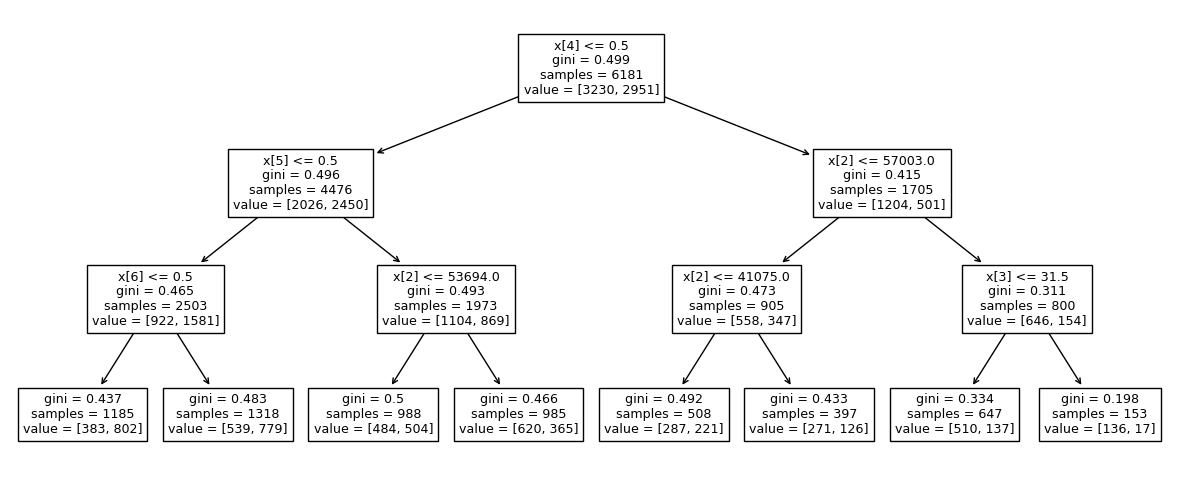

In [22]:
plt.figure(figsize = (15,6))
tree.plot_tree(tree_model)
plt.show()

---
### Performing Grid Searcg Cross Validation

The DecisionTreeClassifier object has many parameters that are use to create, train the best model. Using this method, I can tune the Decision Tree Model. To do this GridSearchCV is used

---

In [24]:
# Define the Model with 2,3,4,5,6 depth and GridSearchCV
model = GridSearchCV(tree_model, param_grid = {'max_depth':[2,3,4,5,6]})

# Train the model using X_train and y_train
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [25]:
# Estimating the Model and the estimators of the best model
model.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=200)

In [26]:
# The score of the best model
model.best_score_

0.6291853398319873